In [373]:
import pandas as pd
import numpy as np

np.set_printoptions(linewidth=150)

In [374]:
data = pd.read_csv("./data/Housing.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [375]:
cat_features = [
    'waterfront',
    'view',
    'condition'
]

In [376]:
pos_data = data[['lat', 'long']]
cat_data = data[cat_features]
target = data['price']

data.drop(columns=[
    'lat', 'long', 'price', 'id', 'sqft_living15',
    'date', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_lot15',
    'grade'
], inplace=True)

data.drop(columns=cat_features, inplace=True)

pos_data

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045
...,...,...
21608,47.6993,-122.346
21609,47.5107,-122.362
21610,47.5944,-122.299
21611,47.5345,-122.069


(array([6.300e+01, 5.330e+02, 3.977e+03, 7.183e+03, 6.345e+03, 2.541e+03, 7.330e+02, 1.930e+02, 3.800e+01, 7.000e+00]),
 array([11.22524339, 11.68839214, 12.15154089, 12.61468964, 13.07783839, 13.54098714, 14.00413589, 14.46728464, 14.93043339, 15.39358214, 15.85673089]),
 <BarContainer object of 10 artists>)

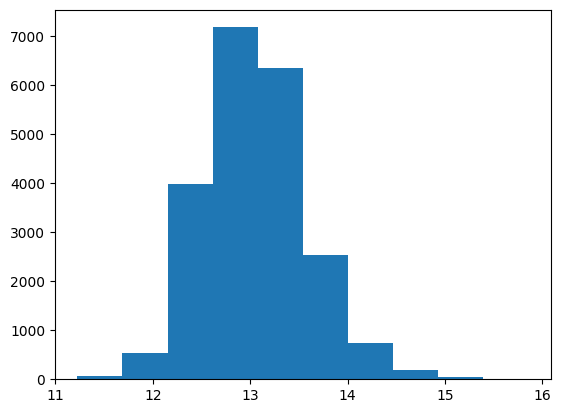

In [377]:
import matplotlib.pyplot as plt

log_target = pd.Series(np.log(target))
plt.hist(np.log(target))

In [378]:
from scipy import stats

# target = target[np.abs(stats.zscore(target)) <= 3]
data = data[(np.abs(stats.zscore(data)) <= 3).all(axis=1)]

# target = target[target.index.intersection(data.index)]
# data = data[data.index.isin(target.index)].reset_index(drop=True)
pos_data = pos_data[pos_data.index.isin(data.index)].reset_index(drop=True)
cat_data = cat_data[cat_data.index.isin(data.index)].reset_index(drop=True)

log_target = log_target[log_target.index.intersection(data.index)].reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

In [379]:
# from scipy import stats

# target = target[np.abs(stats.zscore(target)) <= 3]
# data = data[(np.abs(stats.zscore(data)) <= 3).all(axis=1)]

# target = target[target.index.intersection(data.index)]
# data = data[data.index.isin(target.index)].reset_index(drop=True)
# pos_data = pos_data[pos_data.index.isin(target.index)].reset_index(drop=True)
# cat_data = cat_data[cat_data.index.isin(target.index)].reset_index(drop=True)

# target.reset_index(drop=True, inplace=True)

In [380]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

data = StandardScaler().fit_transform(data)

ohe_cat = OneHotEncoder().fit_transform(cat_data).todense()
data = pd.DataFrame(np.concatenate((data, ohe_cat), axis=1))

print(data.shape)
data

(20648, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.551308,-1.508407,-1.048139,-0.371480,-0.901318,-0.744423,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.384705,0.266412,0.744876,-0.251793,0.957122,0.614666,0.323447,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.551308,-1.508407,-1.577014,-0.044446,-0.901318,-1.307278,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.781897,1.331303,-0.041987,-0.420347,-0.901318,-0.922889,1.595194,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.384705,-0.088552,-0.403170,-0.188792,-0.901318,-0.058014,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20643,-0.384705,0.621376,-0.596661,-0.711219,2.815561,-0.263937,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20644,0.781897,0.621376,0.409492,-0.359225,0.957122,0.806861,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20645,-1.551308,-1.863370,-1.254530,-0.694755,0.957122,-0.964074,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20646,-0.384705,0.621376,-0.506365,-0.616718,0.957122,-0.167840,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [381]:
# from sklearn.linear_model import RidgeCV, LinearRegression, Lasso, ElasticNetCV
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(np.asarray(data), log_target, train_size=0.8, random_state=42)

In [382]:
# import warnings
# warnings.filterwarnings(action='ignore')

# model_1 = LinearRegression().fit(X_train, y_train)
# model_2 = RidgeCV(alphas=np.linspace(0.05, 0.5, 10), cv=5).fit(X_train, y_train)
# model_3 = Lasso(alpha=0.1).fit(X_train, y_train)
# model_4 = ElasticNetCV(alphas=np.linspace(0.05, 1, 10), l1_ratio=0.5).fit(X_train, y_train)

In [383]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# pred_1 = model_1.predict(X_test)
# pred_2 = model_2.predict(X_test)
# pred_3 = model_3.predict(X_test)
# pred_4 = model_4.predict(X_test)

# print(f'MSE Regression: \tR^2 score = {model_1.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, pred_1):.4e} | MAE = {mean_absolute_error(y_test, pred_1):.4e}')
# print(f'Ridge Regression: \tR^2 score = {model_2.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, pred_2):.4e} | MAE = {mean_absolute_error(y_test, pred_2):.4e}')      
# print(f'Lasso Regression: \tR^2 score = {model_3.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, pred_3):.4e} | MAE = {mean_absolute_error(y_test, pred_3):.4e}')      
# print(f'ElasticNet: \t\tR^2 score = {model_4.score(X_test, y_test):.4f} | MSE = {mean_squared_error(y_test, pred_4):.4e} | MAE = {mean_absolute_error(y_test, pred_4):.4e}')      

In [384]:
import os
import pickle
from graph_encoder import encode_edges

edge_index_file = "edin_housing.pickle"
EDGE_CREATING_DISTANCE = 1

if os.path.exists(edge_index_file):
    with open(edge_index_file, 'rb') as f:
        edge_index = pickle.load(f)
else:
    edge_index = encode_edges(pos_data, EDGE_CREATING_DISTANCE)
    
    with open(edge_index_file, "wb") as output:
        pickle.dump(edge_index, output)

In [385]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.551308,-1.508407,-1.048139,-0.371480,-0.901318,-0.744423,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.384705,0.266412,0.744876,-0.251793,0.957122,0.614666,0.323447,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.551308,-1.508407,-1.577014,-0.044446,-0.901318,-1.307278,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.781897,1.331303,-0.041987,-0.420347,-0.901318,-0.922889,1.595194,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.384705,-0.088552,-0.403170,-0.188792,-0.901318,-0.058014,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20643,-0.384705,0.621376,-0.596661,-0.711219,2.815561,-0.263937,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20644,0.781897,0.621376,0.409492,-0.359225,0.957122,0.806861,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20645,-1.551308,-1.863370,-1.254530,-0.694755,0.957122,-0.964074,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20646,-0.384705,0.621376,-0.506365,-0.616718,0.957122,-0.167840,-0.674002,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [386]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
from torch_geometric.transforms import RandomNodeSplit

data = Data(
    torch.tensor(data.to_numpy(), dtype=torch.float32),
    edge_index=edge_index,
    y=torch.tensor(log_target, dtype=torch.float32)
)

node_splitter = RandomNodeSplit(num_test=0.2)
graph = node_splitter(data)

data_loader = NeighborLoader(graph,
                             input_nodes=graph.train_mask,
                             batch_size=64,
                             num_neighbors=[30, 10], 
                             shuffle=True,)

In [387]:
import torch
import torch.nn as nn
import torch_geometric.nn as nn_geom
from torch_geometric.data import Data

class Net(nn.Module):
    def __init__(self, input_size: int, hidden_layer: int):
        super().__init__()
        self.conv1 = nn_geom.SAGEConv(input_size, hidden_layer)
        self.conv2 = nn_geom.SAGEConv(hidden_layer, hidden_layer)
        
        self.linear1 = nn.Linear(hidden_layer, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, hidden_layer)
        self.linear3 = nn.Linear(hidden_layer, 1)

    
    def forward(self, data: Data, edge_index: torch.Tensor) -> torch.Tensor:
        x = self.conv1(data, edge_index).relu()
        x = self.conv2(x, edge_index).relu()

        x = self.linear1(x).relu()
        x = self.linear2(x).relu()
        
        return self.linear3(x)

In [388]:
model = Net(graph.x.shape[1], 16)

loss_criteria = nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [389]:
edge_index.shape

torch.Size([2, 1512000])

In [390]:
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

n_epochs = 50

for epoch in range(n_epochs):
    model.train()
    for batch in data_loader:
        optim.zero_grad()
        out = model(batch.x, batch.edge_index)

        y = batch.y[:batch.batch_size]
        out = out[:batch.batch_size]

        loss = loss_criteria(out, y)
        loss.backward()
        optim.step()

    r2 = r2_score(y.detach(), out.detach())
    print(f'Epoch #{epoch} | MSE_Loss = {loss:.4e} | R^2 = {r2}')    

Epoch #0 | MSE_Loss = 5.5087e-01 | R^2 = -0.2030598439178859
Epoch #1 | MSE_Loss = 5.2951e-01 | R^2 = -0.6713111026756393
Epoch #2 | MSE_Loss = 4.3325e-01 | R^2 = -0.02183260581766211
Epoch #3 | MSE_Loss = 4.9759e-01 | R^2 = -0.044061184525039154
Epoch #4 | MSE_Loss = 3.4789e-01 | R^2 = -0.03910341460822564
Epoch #5 | MSE_Loss = 2.7264e-01 | R^2 = 0.01344046817558131
Epoch #6 | MSE_Loss = 2.1550e-01 | R^2 = -0.5161858458583077
Epoch #7 | MSE_Loss = 4.6686e-01 | R^2 = -0.04257934139103492
Epoch #8 | MSE_Loss = 4.3353e-01 | R^2 = 0.031231146455112047
Epoch #9 | MSE_Loss = 4.3199e-01 | R^2 = -0.3963129722224197
Epoch #10 | MSE_Loss = 4.5193e-01 | R^2 = -0.5402185127062633
Epoch #11 | MSE_Loss = 4.6772e-01 | R^2 = -0.3742548385187936
Epoch #12 | MSE_Loss = 3.6443e-01 | R^2 = -0.37092829675560557
Epoch #13 | MSE_Loss = 3.5648e-01 | R^2 = -0.23065047240115288
Epoch #14 | MSE_Loss = 3.9980e-01 | R^2 = -0.16458000535677786
Epoch #15 | MSE_Loss = 3.7214e-01 | R^2 = -0.1676341437789326


KeyboardInterrupt: 

In [ ]:
model.eval()
predicts = model(graph.x, graph.edge_index)
mse = loss_criteria(predicts[graph.test_mask], graph.y[graph.test_mask])
r2 = r2_score(graph.y[graph.test_mask].detach(), predicts[graph.test_mask].detach())

print(f'GNN : MSE_Loss = {mse:.4e} | R^2 = {r2}')

GNN : MSE_Loss = 2.2161e+11 | R^2 = -2.655853363266595
